In [1]:
import numpy as np
import tensorflow as tf
import tensorflow_hub as hub
import matplotlib.pyplot as plt
from SRGANupscaling.data import plot_encode_comparison

In [2]:
image_path='/Users/sridhargk/code/sridhar211/SRGANupscaling/raw_data/Kaggle100/hr_images/0.png'

In [3]:
# Read image from disk and add batch size
image_file = tf.io.read_file(image_path)
image_uint8 = tf.image.decode_image(image_file)
image_float32 = tf.cast(image_uint8, tf.float32)
image_batch = tf.expand_dims(image_float32, axis=0)

2022-07-14 15:29:18.937178: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Auto-Encoder with 1 Block

2022-07-14 15:29:19.193590: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)


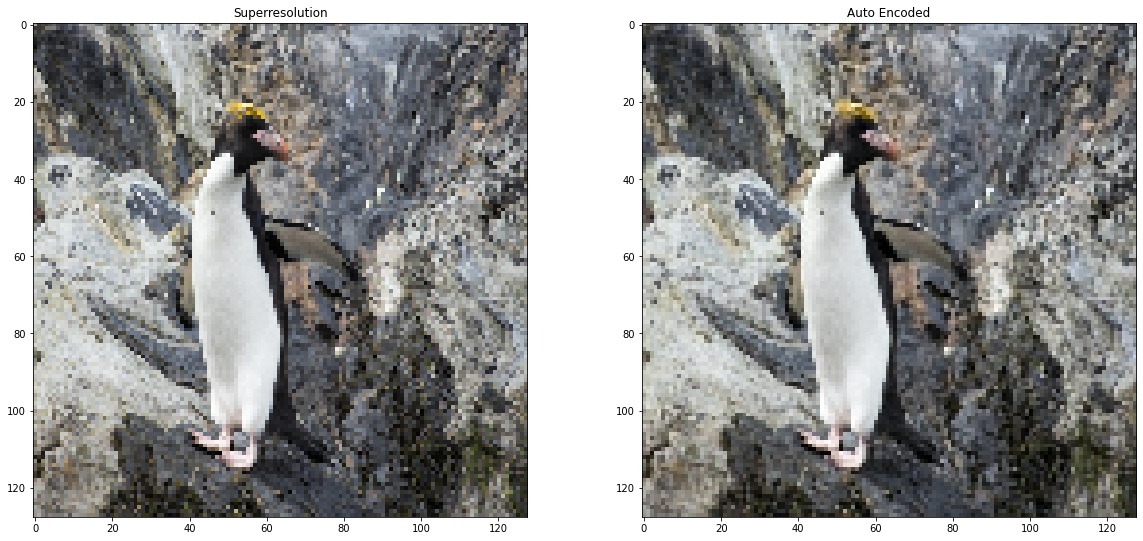

In [4]:
# Load encoder and decoder
encoder = hub.KerasLayer('https://tfhub.dev/emilutz/vgg19-block1-conv2-unpooling-encoder/1') 
decoder = hub.KerasLayer('https://tfhub.dev/emilutz/vgg19-block1-conv2-unpooling-decoder/1')
# Encode and decode the image
image_features = encoder(image_batch)
image_decoded = decoder(image_features)
image_out = tf.cast(image_decoded, tf.uint8)
plot_encode_comparison(image_uint8,image_out[0])

## Auto-Encoder with 2 Blocks

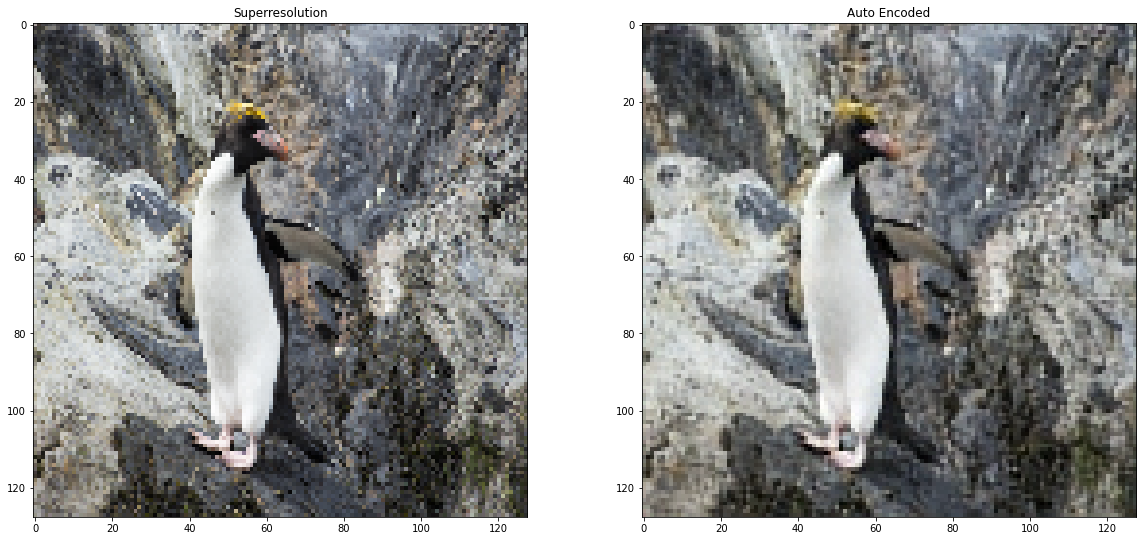

In [9]:
# Load encoder and decoder
encoder = hub.KerasLayer('https://tfhub.dev/emilutz/vgg19-block2-conv2-unpooling-encoder/1') 
decoder = hub.KerasLayer('https://tfhub.dev/emilutz/vgg19-block2-conv2-unpooling-decoder/1')
# Encode and decode the image
image_features = encoder(image_batch)
image_decoded = decoder(image_features)
image_out = tf.cast(image_decoded, tf.uint8)
plot_encode_comparison(image_uint8,image_out[0])

## Auto-Encoder with 3 Blocks

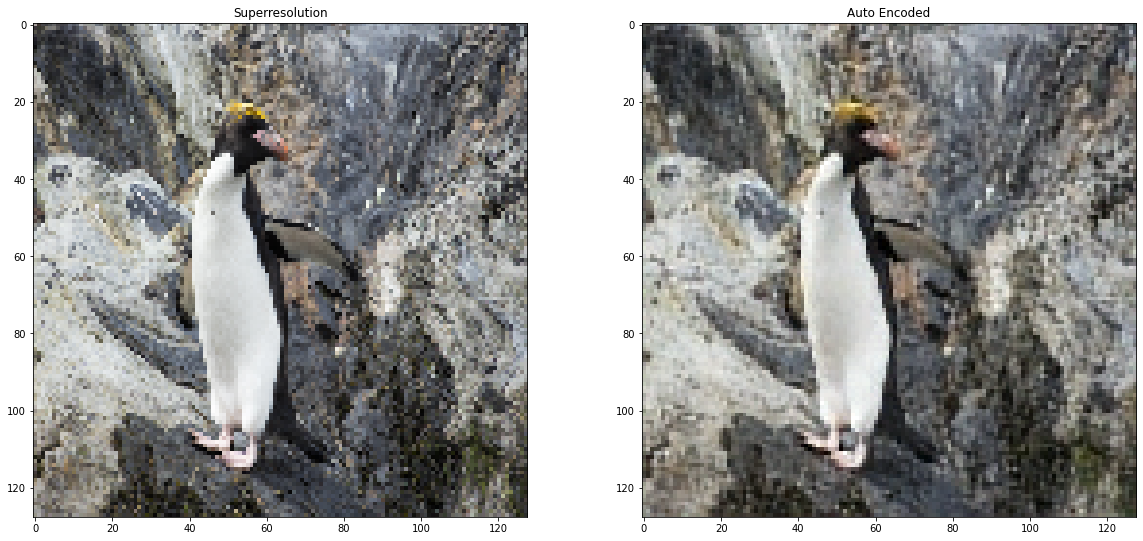

In [6]:
# Load encoder and decoder
encoder = hub.KerasLayer('https://tfhub.dev/emilutz/vgg19-block3-conv2-unpooling-encoder/1') 
decoder = hub.KerasLayer('https://tfhub.dev/emilutz/vgg19-block3-conv2-unpooling-decoder/1')
# Encode and decode the image
[image_features, b1_indices, b2_indices] = encoder(image_batch)
image_decoded = decoder([image_features, b1_indices, b2_indices])
image_out = tf.cast(image_decoded, tf.uint8)
plot_encode_comparison(image_uint8,image_out[0])

## Auto-Encoder with 4 Blocks

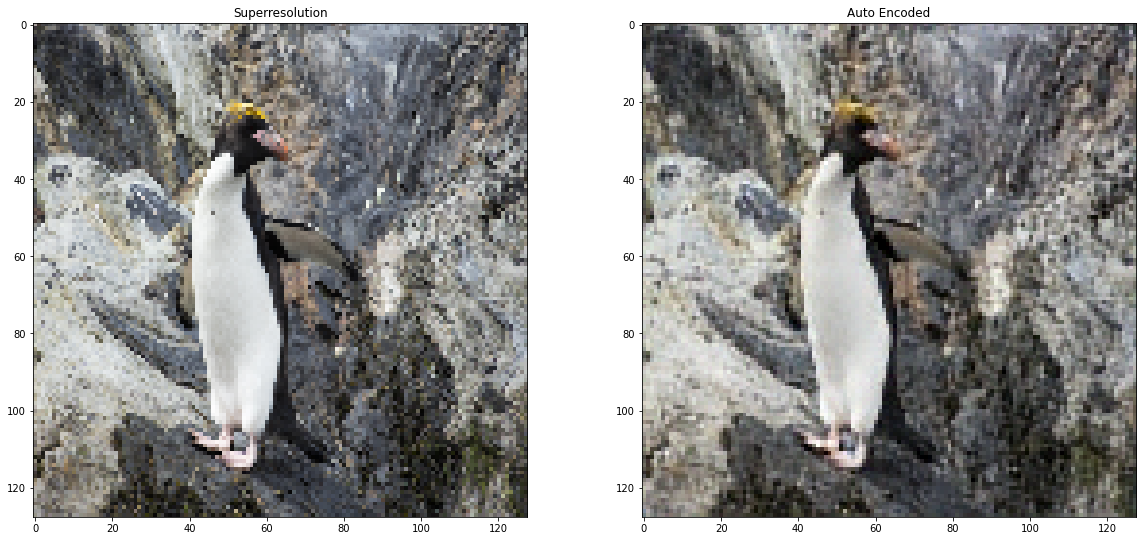

In [7]:
# Load encoder and decoder
encoder = hub.KerasLayer('https://tfhub.dev/emilutz/vgg19-block4-conv2-unpooling-encoder/1') 
decoder = hub.KerasLayer('https://tfhub.dev/emilutz/vgg19-block4-conv2-unpooling-decoder/1') 
# Encode and decode the image
[image_features, b1_indices, b2_indices, b3_indices] = encoder(image_batch)
image_decoded = decoder([image_features, b1_indices, b2_indices, b3_indices])
image_out = tf.cast(image_decoded, tf.uint8)
plot_encode_comparison(image_uint8,image_out[0])

## Auto-Encoder with 5 Blocks

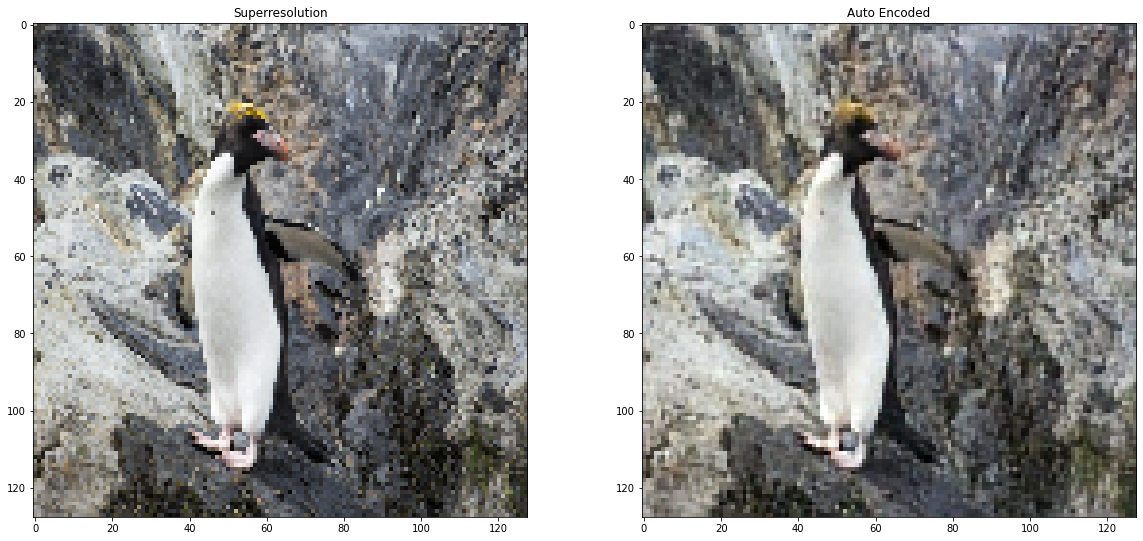

In [8]:
# Load encoder and decoder
encoder = hub.KerasLayer('https://tfhub.dev/emilutz/vgg19-block5-conv2-unpooling-encoder/1') 
decoder = hub.KerasLayer('https://tfhub.dev/emilutz/vgg19-block5-conv2-unpooling-decoder/1')
# Encode and decode the image
[image_features, b1_indices, b2_indices, b3_indices, b4_indices] = encoder(image_batch)
image_decoded = decoder([image_features, b1_indices, b2_indices, b3_indices, b4_indices])
image_out = tf.cast(image_decoded, tf.uint8)
plot_encode_comparison(image_uint8,image_out[0])